-----------
Initializing structure...
time for choose_chunkdivision = 0.000849009 s
Working in 2D dimensions.
Computational cell is 3.6 x 3.2 x 0 with resolution 300
     sphere, center = (0.2,-0.25,0)
          radius 0.2
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     sphere, center = (0.2,0.25,0)
          radius 0.2
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 1.16385 s
-----------
Meep: using complex fields.
Meep progress: 0.35500000000000004/10.0 = 3.6% done in 4.0s, 109.1s to go
on time step 213 (time=0.355), 0.0188508 s/step
Meep progress: 0.7216666666666667/10.0 = 7.2% done in 8.0s, 103.1s to go
on time step 433 (time=0.721667), 0.0181823 s/step
Meep progress: 1.085/10.0 = 10.8% done in 12.0s, 98.7s to go
on time step 652 (time=1.08667), 0.01835 s/step
Meep progress: 1.455/10.0 = 14.6% done in 16.0s, 94.1s to go
on time step 874 (time=1.45667), 0.0180741 s/step
Meep progress: 1.8066666666666669/10.0

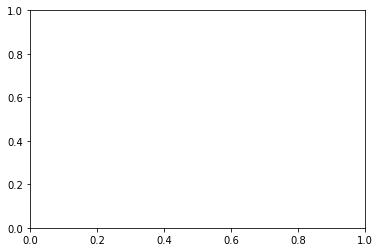

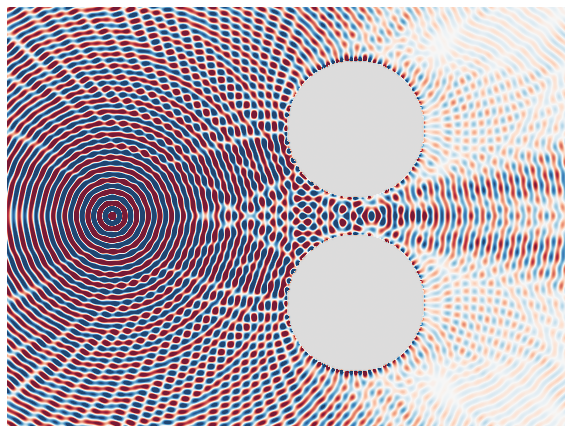

In [28]:
import meep as mp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

fcen = 30

dpml = 1
dpml_v = mp.Vector3(dpml, dpml)
pml_layers = [mp.PML(dpml)]

cell_size = mp.Vector3(1.6, 1.2) + 2*dpml_v
nonpml_vol = mp.Volume(mp.Vector3(), size=cell_size - 2*dpml_v)

geometry = [
    #mp.Sphere(radius=0.5, material=mp.metal).shift(mp.Vector3(0.1, 0)),
    mp.Sphere(radius=0.2, material=mp.metal).shift(mp.Vector3(0.2, -0.25)),
    mp.Sphere(radius=0.2, material=mp.metal).shift(mp.Vector3(0.2, +0.25))
]
#geometry = []

src = [mp.Source(mp.ContinuousSource(fcen),
                 component=mp.Hz,
                 center=mp.Vector3(-0.5, 0))]

sim = mp.Simulation(cell_size=cell_size,
                    geometry=geometry,
                    sources=src,
                    resolution=300,
                    force_complex_fields=True,
                    boundary_layers=pml_layers)

sim.init_sim()

animate = mp.Animate2D(sim,
                       #f=plt.figure(figsize=(24, 18)),
                       fields=mp.Hz,
                       realtime=True,
                       field_parameters={
                           'alpha':0.9,
                           'cmap':'RdBu',
                           'interpolation':'spline36',
                           'vmin':-4,
                           'vmax':+4
                       },
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.1})

#sim.run(mp.at_every(0.1,animate),until=10)
sim.run(until=10)
#animate.to_mp4(10, "animate.mp4")

eps_data = sim.get_array(vol=nonpml_vol, component=mp.Dielectric)
ez_data = sim.get_array(vol=nonpml_vol, component=mp.Hz)

ez_data = np.real(ez_data)

plt.figure(figsize=(10, 10))
plt.imshow(-eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', vmin=-4, vmax=+4, alpha=0.9)
plt.axis('off')
plt.show()

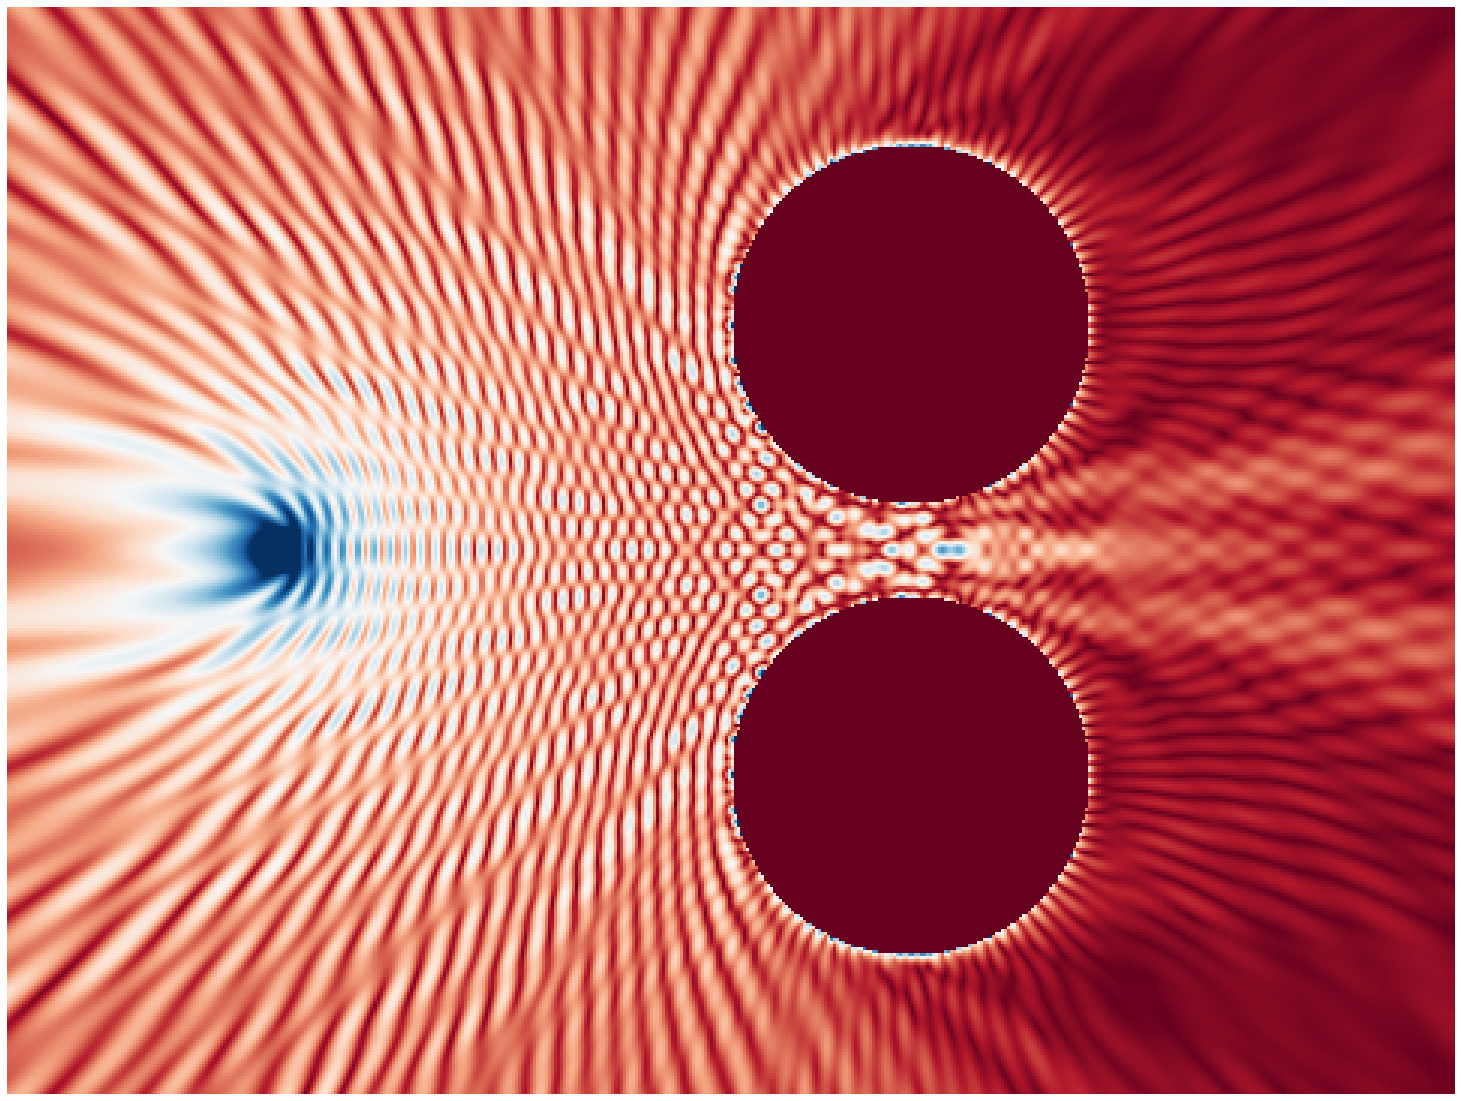

In [34]:
eps_data = sim.get_array(vol=nonpml_vol, component=mp.Dielectric)
ez_data = sim.get_array(vol=nonpml_vol, component=mp.Hz)

#ez_data = np.real(ez_data - background)
#ez_data = np.real(background)

#ez_data = np.real(background)
#ez_data = np.real(ez_data - background)
#ez_data = np.real(ez_data)
ez_data = np.abs(ez_data)/2-4

plt.figure(figsize=(30, 20))
plt.imshow(ez_data.transpose(), cmap='RdBu', vmin=-4, vmax=+4)
plt.imshow(-eps_data.transpose(), cmap='binary', alpha=0)
plt.axis('off')
plt.show()

In [6]:
background = sim.get_array(vol=nonpml_vol, component=mp.Hz)